In [18]:
import nltk.data
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import TreebankWordTokenizer, WordPunctTokenizer, RegexpTokenizer


from nltk.corpus import stopwords

## Text tokenization

`sent_tokenize` uses `PunktSentenceTokenizer` to track the end of sentences

In [19]:
sentence = """Note that if you pass None as the first argument, then your template will be rendered without any context processors. That could make the rendering slightly faster, but it might lead to CSRF errors, and means that you won't be able to access variables from the context processors (e.g. {{ request }} and {{ user }}) unless you explicitly add them to the context. I wouldn't recommend using None like this unless you understand these consequences.
    """
sentence = sentence.replace('{', '').replace('}', '').replace('\n', '')
sent_tokenize(sentence)

['Note that if you pass None as the first argument, then your template will be rendered without any context processors.',
 "That could make the rendering slightly faster, but it might lead to CSRF errors, and means that you won't be able to access variables from the context processors (e.g.",
 'request  and  user ) unless you explicitly add them to the context.',
 "I wouldn't recommend using None like this unless you understand these consequences."]

If there are a lot of sentences to be tokenized, it is better to load `PunktSentenceTokenizer` and call it when needed

In [20]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
tokenizer.tokenize(sentence)

['Note that if you pass None as the first argument, then your template will be rendered without any context processors.',
 "That could make the rendering slightly faster, but it might lead to CSRF errors, and means that you won't be able to access variables from the context processors (e.g.",
 'request  and  user ) unless you explicitly add them to the context.',
 "I wouldn't recommend using None like this unless you understand these consequences."]

Tokenize into different words - and decide what to do with punctuation

In [21]:
word_tokenize('To Lwów, kurwa')

['To', 'Lwów', ',', 'kurwa']

In [22]:
sample = "He can't, doesnt, doesn't I've hadn't"

Word tokenizers can extract **contractions** by default. Here is `TreebankWordTokenizer`:

In [23]:
word_tokenize(sample)

['He',
 'ca',
 "n't",
 ',',
 'doesnt',
 ',',
 'does',
 "n't",
 'I',
 "'ve",
 'had',
 "n't"]

 `PunktWordTokenizer`

In [24]:
word_punkt_tokenizer = WordPunctTokenizer()
word_punkt_tokenizer.tokenize(sample)

['He',
 'can',
 "'",
 't',
 ',',
 'doesnt',
 ',',
 'doesn',
 "'",
 't',
 'I',
 "'",
 've',
 'hadn',
 "'",
 't']

In [25]:
tokenizer =  RegexpTokenizer("[\w']+")
tokenizer.tokenize("Can't is a contraction.")

["Can't", 'is', 'a', 'contraction']

##### Stop words 
words that are OK to be ignored (such as _the, a, any, is_)

In [27]:
english_stop_words = set(stopwords.words('english'))

[word for word in tokenizer.tokenize(sample) if word not in english_stop_words]

['He', "can't", 'doesnt', "I've"]

In [34]:
stopwords.words('german')

['aber',
 'alle',
 'allem',
 'allen',
 'aller',
 'alles',
 'als',
 'also',
 'am',
 'an',
 'ander',
 'andere',
 'anderem',
 'anderen',
 'anderer',
 'anderes',
 'anderm',
 'andern',
 'anderr',
 'anders',
 'auch',
 'auf',
 'aus',
 'bei',
 'bin',
 'bis',
 'bist',
 'da',
 'damit',
 'dann',
 'der',
 'den',
 'des',
 'dem',
 'die',
 'das',
 'daß',
 'derselbe',
 'derselben',
 'denselben',
 'desselben',
 'demselben',
 'dieselbe',
 'dieselben',
 'dasselbe',
 'dazu',
 'dein',
 'deine',
 'deinem',
 'deinen',
 'deiner',
 'deines',
 'denn',
 'derer',
 'dessen',
 'dich',
 'dir',
 'du',
 'dies',
 'diese',
 'diesem',
 'diesen',
 'dieser',
 'dieses',
 'doch',
 'dort',
 'durch',
 'ein',
 'eine',
 'einem',
 'einen',
 'einer',
 'eines',
 'einig',
 'einige',
 'einigem',
 'einigen',
 'einiger',
 'einiges',
 'einmal',
 'er',
 'ihn',
 'ihm',
 'es',
 'etwas',
 'euer',
 'eure',
 'eurem',
 'euren',
 'eurer',
 'eures',
 'für',
 'gegen',
 'gewesen',
 'hab',
 'habe',
 'haben',
 'hat',
 'hatte',
 'hatten',
 'hier',
 '

In [35]:
stopwords.fileids()

['arabic',
 'azerbaijani',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish',
 'turkish']

In [36]:
import matplotlib.pyplot as plt

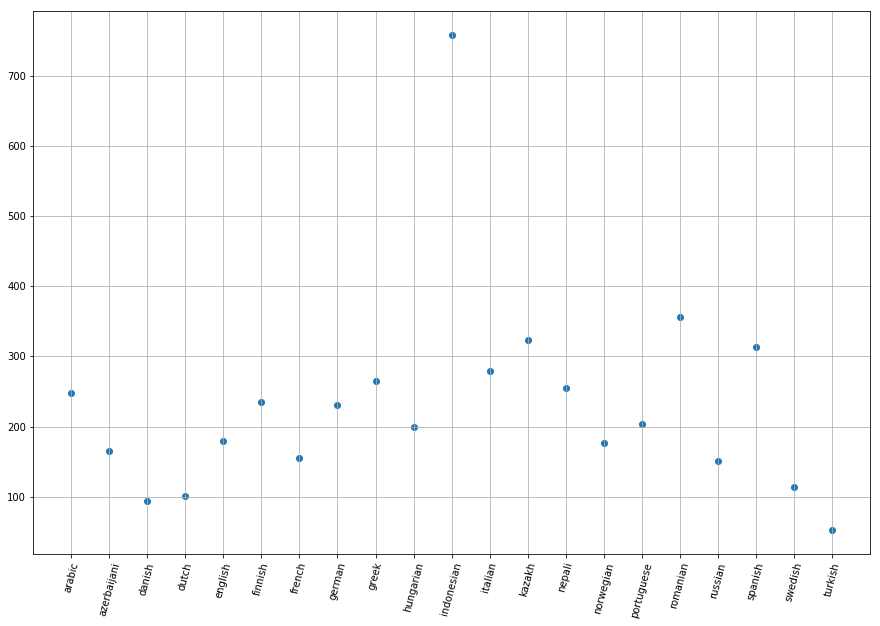

In [56]:
plt.figure(figsize=(15,10))
n = len(stopwords.fileids())
multilang_stopwords = [stopwords.words(d) for d in stopwords.fileids()]
plt.scatter(range(n), [len(k) for k in multilang_stopwords])
plt.xticks(ticks=range(0, n), labels=stopwords.fileids(), rotation=75)
plt.grid()

In [45]:
[len(k) for k in multilang_stopwords]

[248,
 165,
 94,
 101,
 179,
 235,
 155,
 231,
 265,
 199,
 758,
 279,
 324,
 255,
 176,
 203,
 356,
 151,
 313,
 114,
 53]